In [1]:
import os
import numpy as np
import random
import cv2
import pandas as pd

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import Normalize
import dataloader as DT
from dataloader import get_dataloader

/home/lahj91/anaconda3/envs/SR/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
'''
실행시키지 말 것 dataset zip파일 압축 푸는 코드
'''
# import zipfile
# DIV2K = zipfile.ZipFile('/home/lahj91/SR/DIV2K_valid_HR.zip')
# DIV2K.extractall('/home/lahj91/SR/DIV2K')
# DIV2K.close()

In [144]:
'''
실행시키지 말 것 data 이름 저장하는 코드
'''
# name = os.listdir('./SR_training_datasets/BSDS200')#해당주소에서 data 이름 list로 추출
# df = pd.DataFrame(name, columns = ['name']) #열 이름 = name 으로 list name을 저장
# df.to_csv("BSDS200_DataName.csv", index=False) #csv 파일로 저장

In [290]:
'''
실행시키지 말 것 data 이름 저장하는 코드
'''
# name = os.listdir('./DIV2K/DIV2K_train_HR')
# df = pd.DataFrame(name, columns = ['name']) #열 이름 = name 으로 list name을 저장
# df.to_csv("DIV2K_train_DataName.csv", index=False) #csv 파일로 저장

In [299]:
'''
실행시키지 말 것 data 이름 저장하는 코드
'''
# name = os.listdir('./DIV2K/DIV2K_valid_HR')
# df = pd.DataFrame(name, columns = ['name']) #열 이름 = name 으로 list name을 저장
# df.to_csv("DIV2K_valid_DataName.csv", index=False) #csv 파일로 저장

In [192]:
'''
실행시키지 말 것 data 이름 저장하는 코드
'''
# name = os.listdir('/home/lahj91/SR/SR_testing_datasets/BSDS100')
# df = pd.DataFrame(name, columns = ['name']) #열 이름 = name 으로 list name을 저장
# df.to_csv("valid_BSDS200.csv", index=False) #csv 파일로 저장

In [5]:
'''
실행시키지 말 것 data 이름 저장하는 코드
'''
name = os.listdir('/home/lahj91/SR/SR_training_datasets/General100')

df = pd.DataFrame("general100", columns="data")
df = pd.DataFrame(name, columns = ['name']) #열 이름 = name 으로 list name을 저장
df.to_csv("train_General100.csv", index=False) #csv 파일로 저장

ValueError: DataFrame constructor not properly called!

In [7]:
'''
부가적인 함수들
'''
def img2tensor(img, normalize=True):
    # handle gray image
    if len(img.shape)==2:
        img = img[:,:,np.newaxis]
    img = np.transpose(img, axes=(2,0,1)).astype(np.float32)
    if normalize:
        img = img / img.max()
    return torch.from_numpy(img)

def tensor2img(tensor):
    if len(tensor.shape)==2:
        img = tensor.cpu().numpy()
    elif len(tensor.shape)==3:
        img = np.transpose(tensor.cpu().numpy(), axes=(1,2,0))
    return img

def read_img_as_tensor(img_path, img_size=224, normalize=True):
    if isinstance(img_size, int):
        img_size = (img_size, img_size)
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img2tensor(img, normalize=normalize)
    return img

In [38]:
import os
import numpy as np
import random
import cv2
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import Normalize

from dataloader import get_dataloader


In [39]:
data_loader = get_dataloader(batch_size=1,
                                    setting='valid', 
                                    augmentation=False,
                                    pin_memory=True,
                                    SR_mode = 2,
                                    data='DIV2K',
                                    data_merge=False,
                                    num_workers=0
                                    )

In [40]:
i = 1
for items in data_loader:
    items = items
    i += 1
    if i>1:
        break

In [13]:
torch.zeros(3,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [5]:
items.keys()

dict_keys(['origin', 'degraded', 'mask'])

In [41]:
len(items['degraded'].keys())

442

In [44]:
class valid_batch_making:
    def __init__(self, items, batch=4):
        self.current = 0
        self.items = items
        self.stop = len(items['degraded'].keys())
        self.batch = batch

        concatenated = torch.tensor([])
        for key, value in self.items['degraded'].items():
            concatenated = torch.cat((value, concatenated))
        self.items = concatenated

    def __iter__(self):
        return self

    def __next__(self):
        if self.current < self.stop:
            temp = self.items[self.current:min(self.current + self.batch, self.stop), :, :, :]
            self.current += self.batch
            return temp
        else:
            raise StopIteration

In [45]:
for item in valid_batch_making(items, batch = 4):
    print(item.shape)

torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
torch.Size([4, 3, 48, 48])
t

In [13]:
class Counter:
    def __init__(self, stop):
        self.current = 0    # 현재 숫자 유지, 0부터 지정된 숫자 직전까지 반복
        self.stop = stop    # 반복을 끝낼 숫자
 
    def __iter__(self):
        return self         # 현재 인스턴스를 반환
 
    def __next__(self):
        if self.current < self.stop:    # 현재 숫자가 반복을 끝낼 숫자보다 작을 때
            r = self.current            # 반환할 숫자를 변수에 저장
            self.current += 1           # 현재 숫자를 1 증가시킴
            return r                    # 숫자를 반환
        else:                           # 현재 숫자가 반복을 끝낼 숫자보다 크거나 같을 때
            raise StopIteration         # 예외 발생
 
for i in Counter(3):
    print(i, end=' ')

In [42]:
i = 0
catt = torch.tensor([])
for key, value in items['degraded'].items():
    catt = torch.cat((value, catt))


In [43]:
catt.shape

torch.Size([442, 3, 48, 48])

In [ ]:
batch = 5


In [35]:
catt.shape

torch.Size([442, 3, 48, 48])

In [ ]:
batch = 2
lst = [[]]
for _ in items['degraded'].keys():
    lst = np.append(lst, )

In [4]:
items['origin'].squeeze(0).permute(1,2,0)

tensor([[[1.0000, 0.9843, 0.9412],
         [1.0000, 0.9843, 0.9412],
         [1.0000, 0.9882, 0.9451],
         ...,
         [0.9882, 0.8275, 0.6980],
         [0.9882, 0.8275, 0.7020],
         [0.9882, 0.8275, 0.7020]],

        [[1.0000, 0.9843, 0.9412],
         [1.0000, 0.9843, 0.9412],
         [1.0000, 0.9843, 0.9412],
         ...,
         [0.9922, 0.8275, 0.6980],
         [0.9843, 0.8275, 0.6980],
         [0.9882, 0.8235, 0.6941]],

        [[1.0000, 0.9843, 0.9412],
         [1.0000, 0.9843, 0.9412],
         [1.0000, 0.9843, 0.9373],
         ...,
         [0.9922, 0.8275, 0.6980],
         [0.9882, 0.8235, 0.6941],
         [0.9922, 0.8196, 0.6902]],

        ...,

        [[0.7451, 0.8000, 0.7922],
         [0.7333, 0.7843, 0.7804],
         [0.7294, 0.7843, 0.7804],
         ...,
         [0.5333, 0.7294, 0.7412],
         [0.4431, 0.6784, 0.6941],
         [0.4627, 0.6784, 0.6941]],

        [[0.7451, 0.7725, 0.7647],
         [0.7451, 0.7725, 0.7647],
         [0.

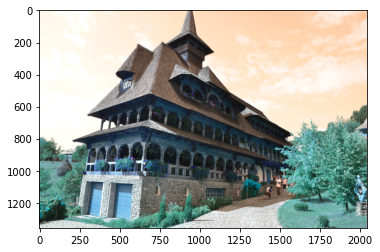

In [6]:
plt.imshow(items['origin'].squeeze(0).permute(1,2,0))

In [8]:
items["item_origin"]['0_0'].shape

torch.Size([1, 96, 96, 3])

In [10]:
torch.zeros_like(items["item_origin"]['0_0'][0,:,:,0]).shape

torch.Size([96, 96])

In [ ]:
import dataloader as DT

In [9]:
exam = DT.dataset_SR()

In [12]:
exam.data

'DIV2K'

In [19]:
exam.__getitem__(2)['origin']

tensor([[[0.3749, 0.3749, 0.3642,  ..., 0.2571, 0.2571, 0.2714],
         [0.3678, 0.3607, 0.3678,  ..., 0.2678, 0.2642, 0.2714],
         [0.3607, 0.3571, 0.3678,  ..., 0.2535, 0.2607, 0.2678],
         ...,
         [0.2535, 0.2535, 0.2500,  ..., 0.2464, 0.2464, 0.2393],
         [0.2571, 0.2500, 0.2571,  ..., 0.2285, 0.2393, 0.2500],
         [0.2393, 0.2393, 0.2393,  ..., 0.2393, 0.2393, 0.2500]],

        [[0.4784, 0.4784, 0.4701,  ..., 0.3258, 0.3258, 0.3423],
         [0.4701, 0.4619, 0.4701,  ..., 0.3382, 0.3299, 0.3382],
         [0.4619, 0.4577, 0.4701,  ..., 0.3217, 0.3299, 0.3382],
         ...,
         [0.3588, 0.3588, 0.3546,  ..., 0.3052, 0.3052, 0.2969],
         [0.3629, 0.3546, 0.3629,  ..., 0.2845, 0.2969, 0.3093],
         [0.3423, 0.3423, 0.3423,  ..., 0.2969, 0.2969, 0.3093]],

        [[0.3153, 0.3153, 0.3087,  ..., 0.2693, 0.2693, 0.2825],
         [0.3087, 0.3022, 0.3087,  ..., 0.2792, 0.2726, 0.2792],
         [0.3055, 0.2989, 0.3120,  ..., 0.2660, 0.2726, 0.

In [12]:
data_name_list1 = pd.read_csv('./DataName/' + "train" + "_" + "DIV2K" + ".csv")
data_name_list2 = pd.read_csv('./DataName/' + "train" + "_" + "General100" + ".csv")
data_name_list3 = pd.read_csv('./DataName/' + "train" + "_" + "BSDS200" + ".csv")

In [17]:
list = [data_name_list1,data_name_list2,data_name_list3]
data_all=[]
for i in list:
    data_all.append(i)

In [18]:
data_all
data_all = pd.concat(data_all, axis=0, ignore_index=True)

In [19]:
data_all

,data,name
0,DIV2K,0706.png
1,DIV2K,0791.png
2,DIV2K,0027.png
3,DIV2K,0119.png
4,DIV2K,0481.png
...,...,...
1095,BSDS200,78019.png
1096,BSDS200,176019.png
1097,BSDS200,22013.png
1098,BSDS200,187039.png


In [10]:
data_name_list.iloc[0]['data']

'DIV2K'

In [61]:
import os, sys
# sys.path.append(os.path.dirname(os.path.abspath(__file__)))

import numpy as np
import random
import cv2
import pandas as pd
import torch

from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Normalize

import config



class dataset_SR(Dataset):
    def __init__(self,
                setting = "train",
                augmentation = True,
                SR_mode = 2,
                data="DIV2K",
                data_merge = False
                ):
        super(dataset_SR, self).__init__()
        self.SR_mode = SR_mode
        self.img_size = SR_mode * 48
        self.data = data
        self.setting = setting
        
        self.augmentation = augmentation
        self.flip = 0.5
        self.rotation = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]
        self.degradation = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_AREA, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]
        self.channel_wise_noise = True
        
        self.MODE_PATH = config.MODE_PATH
        self.normalize_img = Normalize(config.IMG_NORM_MEAN, config.IMG_NORM_STD)
        self.prefix = self.MODE_PATH[self.setting] + self.data + '/'
        self.data_merge = data_merge
        self.intersection = config.PIXEL_INTERSECTION

        if self.setting == "train":
            self.DATA_LIST = config.TRAINING_DATA_LIST
        else:
            self.DATA_LIST = config.TEST_DATA_LIST

            

        if self.data_merge:
            data_all = []
            for i in self.DATA_LIST:
                df = pd.read_csv(config.DATA_LIST_DIR + self.setting + "_" + i + ".csv")
                data_all.append(df)
            self.data_name_list = pd.concat(data_all, axis=0, ignore_index=True)
        else:
            self.data_name_list = pd.read_csv(config.DATA_LIST_DIR + self.setting + "_" + self.data + ".csv")
            

    def __len__(self):
        return len(self.data_name_list)
    

    def __getitem__(self, idx):
        if self.data_merge:
            view_path = self.MODE_PATH[self.setting] + self.data_name_list.iloc[idx]['data'] + '/' + self.data_name_list.iloc[idx]['name']
        else:
            view_path = self.prefix + self.data_name_list.iloc[idx]['name']
        origin = cv2.imread(view_path, cv2.IMREAD_UNCHANGED).copy()
        if self.setting == "valid":
            idx_x = [i for i in range(0,origin.shape[0]-self.img_size+1, self.img_size-self.intersection)]
            if origin.shape[0]%(self.img_size) != 0:
                idx_x = np.append(idx_x, origin.shape[0]-self.img_size)
            idx_y = [i for i in range(0,origin.shape[1]-self.img_size+1, self.img_size-self.intersection)]
            if origin.shape[1]%(self.img_size) != 0:
                idx_y = np.append(idx_y, origin.shape[1]-self.img_size)
            item_origin = {}
            item_degraded = {}
            for i in idx_x:
                for j in idx_y:
                    item_origin["{}_{}".format(i,j)] = origin[i:i+self.img_size, j:j+self.img_size]
                    item_degraded["{}_{}".format(i,j)] = self.normalize_img(torch.from_numpy(cv2.resize(origin[i:i+self.img_size, j:j+self.img_size], dsize=(48,48), interpolation=cv2.INTER_CUBIC).transpose(2,0,1)).float() / 255)
            items = {"item_origin" : item_origin, "item_degraded" : item_degraded}
            return items

        p, q = random.randint(0, origin.shape[0]-self.img_size), random.randint(0, origin.shape[1]-self.img_size)
        origin = origin[p:p+self.img_size,  q:q+self.img_size] #random crop(96*96)으로 origin data 생성
        if self.augmentation:
            if self.channel_wise_noise: #channel-wise noise
                pn = np.random.uniform(*[1 - 0.4, 1 + 0.4], size=(3))
                origin = np.minimum(255., np.maximum(0., origin * pn[np.newaxis, np.newaxis, :]))
            if random.random() < self.flip: #좌우반전
                origin = cv2.flip(origin, 1)
            if self.rotation != False: #rotation
                rd = random.random()
                if rd < 3/4:
                    origin = cv2.rotate(origin, random.choice(self.rotation))
            degraded = cv2.resize(origin, dsize=(48,48), interpolation=random.choice(self.degradation))
            
        else:
            degraded = cv2.resize(origin, dsize=(48,48), interpolation=cv2.INTER_CUBIC)
            
        interpolated = cv2.resize(degraded, dsize=(self.img_size,self.img_size), interpolation=cv2.INTER_CUBIC) #bicubic으로 degraded를 96*96 size 복원 fx=0.5, fy=0.5,

        items = {}
        items['origin'] = torch.from_numpy(origin.transpose(2,0,1)).float() / 255
        items['degraded'] = self.normalize_img(torch.from_numpy(degraded.transpose(2,0,1)).float() / 255)
        items['interpolated'] = self.normalize_img(torch.from_numpy(interpolated.transpose(2,0,1)).float() / 255)

        return items

    
    
def get_dataloader(batch_size=16, setting='train', augmentation=True, pin_memory=False, num_workers=0, **kwargs): #num_workers는 hyperparameter tunning의 영역
    if setting == 'train':
        augmentation = True
    elif (setting == 'test') or (setting == 'valid'):
        augmentation = False
    dataloader = dataset_SR(setting=setting, augmentation=augmentation, **kwargs)
    return DataLoader(dataloader, batch_size=batch_size, shuffle=augmentation, pin_memory=pin_memory, num_workers=num_workers)


In [62]:
exam = dataset_SR(setting="valid")

In [56]:
exam.__getitem__(0)['degraded'].shape

torch.Size([3, 48, 48])

In [64]:
exam.__getitem__(0)["item_degraded"]["0_0"].shape

torch.Size([3, 48, 48])

In [47]:
exam.__getitem__(0)["item_degraded"]["0_0"].shape

(48, 48, 3)

In [65]:
exam_dataloader = get_dataloader(batch_size=1)

In [67]:
i = 1
while i == 1:
    for A in exam_dataloader:
        items = A
    i+=1

KeyboardInterrupt: 

In [128]:
origin = cv2.imread('/home/lahj91/SR/datasets/SR_testing_datasets/DIV2K/0801.png', cv2.IMREAD_UNCHANGED)

In [129]:
origin.shape

(1356, 2040, 3)

In [130]:
size = origin.shape
# size = [200, 200]
SR_mode = 2
intersection = 17

In [131]:
idx_x = [i for i in range(0,size[0]-SR_mode*48+1, SR_mode*48-intersection)]
if size[0]%(SR_mode*48) != 0:
    idx_x = np.append(idx_x, size[0]-48*SR_mode)
idx_y = [i for i in range(0,size[1]-SR_mode*48+1, SR_mode*48-intersection)]
if size[1]%(SR_mode*48) != 0:
    idx_y = np.append(idx_y, size[1]-48*SR_mode)
items = {}
for i in idx_x:
    for j in idx_y:
        items["{}_{}".format(i,j)] = origin[i:i+48*SR_mode, j:j+48*SR_mode]

In [137]:
items["0_0"].shape

(96, 96, 3)

In [85]:
if size[0]%(SR_mode*48) == 0:
    idx_x = np.append(idx_x, size[0]-48*SR_mode)

In [86]:
idx_x

array([ 0, 79, 96])

In [54]:
np.append(idx_x, size[0]-48*SR_mode)

array([0.])